# Plotting Data

### Introduction

An excellent way for us to get a better understanding of our data is by plotting our data.  In this lesson, we'll see how matplotlib functionality is built directly into pandas, and how we can quickly create plots with the integration of this library into pandas.

### Loading our Data

So let's again load up our houston claims dataset.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/pandas-free-curriculum/master/houston_claims.csv"
claims_df = pd.read_csv(url, index_col = 0)

And again, we'll look at the columns available.

In [2]:
claims_df.columns

Index(['reportedCity', 'dateOfLoss', 'elevatedBuildingIndicator', 'floodZone',
       'latitude', 'longitude', 'lowestFloodElevation',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'yearofLoss',
       'reportedZipcode', 'id'],
      dtype='object')

### Plotting data

Now pandas builds allows us to plot both our dataframes and series objects.  For example, imagine that we want to get a sense of the distributions of our different features.  Doing so is pretty simple.

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'lowestFloodElevation'}>,
        <Axes: title={'center': 'amountPaidOnBuildingClaim'}>],
       [<Axes: title={'center': 'amountPaidOnContentsClaim'}>,
        <Axes: title={'center': 'reportedZipcode'}>]], dtype=object)

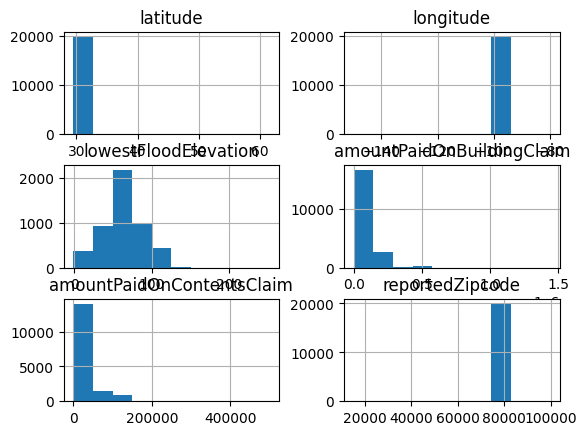

In [3]:
claims_df.hist()

So this is a nice way to get an overview of our data.  But as we can see, it's a little squished.  Instead, let's select a column of data that we want to focus in on and then call `hist` on the selected series.

<Axes: >

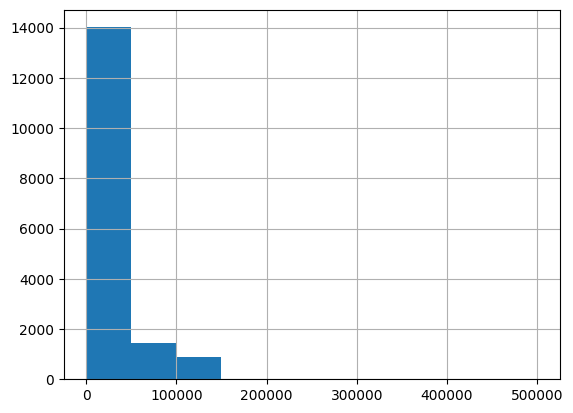

In [4]:
claims_df['amountPaidOnContentsClaim'].hist()

Above, we can see that our amount paid is frequently zero, and that most of the data is between $0$ and $100,000$.  Let's scope our data down and then plot again.

<Axes: >

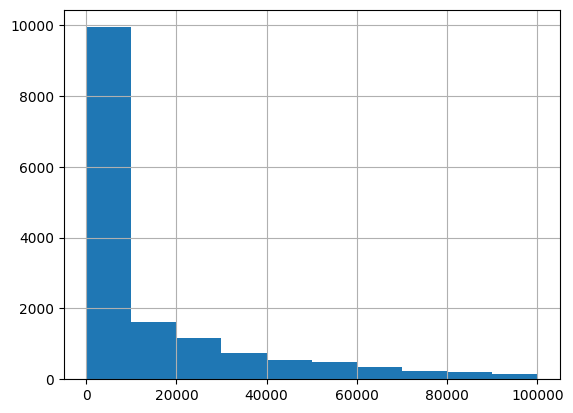

In [5]:
selected_claims = claims_df[claims_df['amountPaidOnContentsClaim'] < 100000]

selected_claims['amountPaidOnContentsClaim'].hist()

### Using the plot method

The above looks pretty good, but let's say that we want to add a title to this.  We can do so by using the `plot` method, and specifying the values of a couple keyword arguments.

<Axes: title={'center': 'Distribution of Content Claims'}, ylabel='Frequency'>

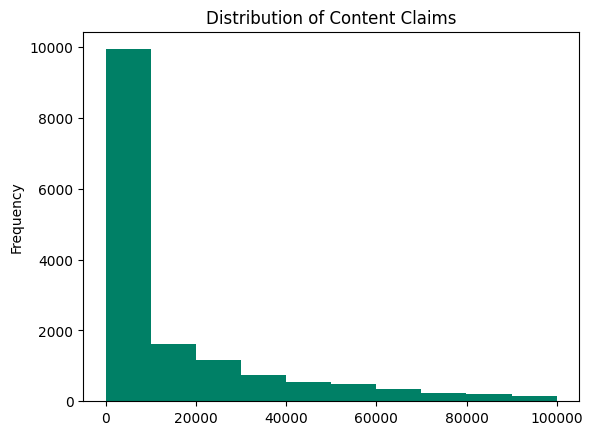

In [6]:
selected_claims['amountPaidOnContentsClaim'].plot(kind = 'hist',
                                                  title = 'Distribution of Content Claims',
                                                  colormap = 'summer')

Notice that with the plot method, we specify the type of graph, `kind = 'hist'`, and add a title with `title = 'Distribution of Content Claims'`.  Finally, we changed the color of the plot by specifying a colormap.

> A list of available color maps is available [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

With the `plot` method, we can decide to only display data within a specific range.  For example, here we'll set the limit of our xaxis to be between $10,000$ and $100,000$.

<Axes: title={'center': 'Distribution of Content Claims'}, ylabel='Frequency'>

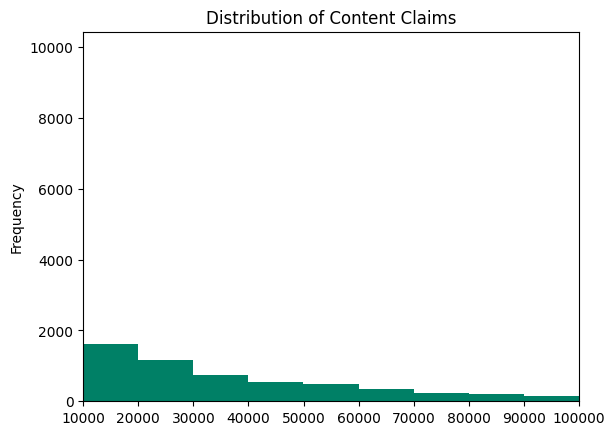

In [7]:
selected_claims['amountPaidOnContentsClaim'].plot(kind = 'hist',
                                                  title = 'Distribution of Content Claims', xlim = [10000, 100000],
                                                  colormap = 'summer')

And let's set the ylim to be between $0$ and $2000$.

<Axes: title={'center': 'Distribution of Content Claims'}, ylabel='Frequency'>

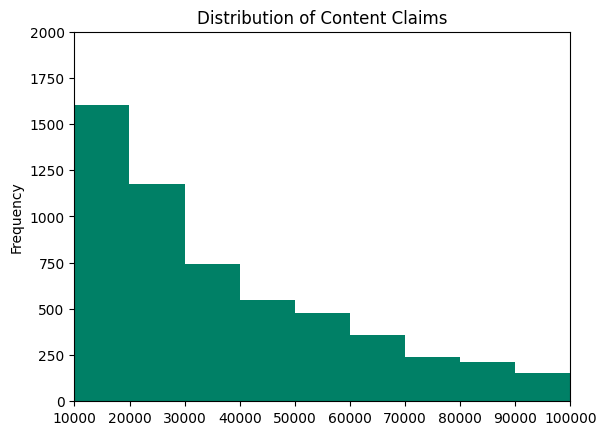

In [8]:
selected_claims['amountPaidOnContentsClaim'].plot(kind = 'hist',
                                                  title = 'Distribution of Content Claims', xlim = [10000, 100000],
                                                  ylim = [0, 2000],
                                                  colormap = 'summer')

### Working with Scatter Plots

The other main plot to work with is the scatter plot, which shows the relationship between two different kinds of data.

For example, let's see if there is a relationship between the `amountPaidOnContentsClaim` and the `amountPaidOnBuildingClaim`.  

<Axes: xlabel='amountPaidOnContentsClaim', ylabel='amountPaidOnBuildingClaim'>

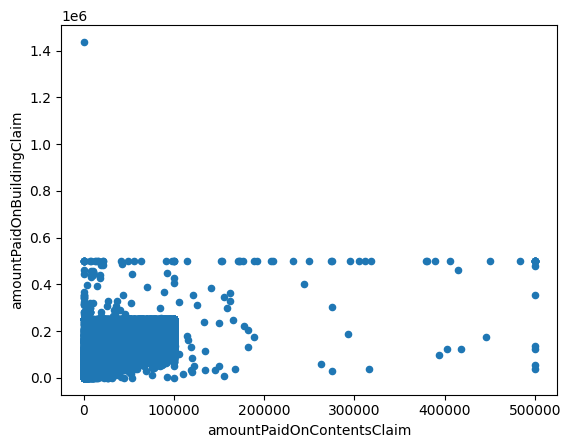

In [9]:
claims_df.plot(kind = 'scatter', x = 'amountPaidOnContentsClaim', y = 'amountPaidOnBuildingClaim')

> So to plot the two kinds of data, we specify the `kind` as `scatter`, and then specify the data plotted on the x and y axes.  

Looking at the data, we see that there is a cutoff around 500,000 dollars, for the amount paid on building claim.  And it looks like there is another cutoff for amount paid on building around 250,000 dollars.  
> Perhaps there are different caps for different kinds of buildings (like residential vs commercial buildings).  

Unfortunately, it's still difficult to get a sense of the relationship between contents and building claims.  Looking at the bottom left of the above plot, we appear to have too many samples.  So let's sample a subset of our `selected_claims` data, and then plot this subset.

<Axes: xlabel='amountPaidOnContentsClaim', ylabel='amountPaidOnBuildingClaim'>

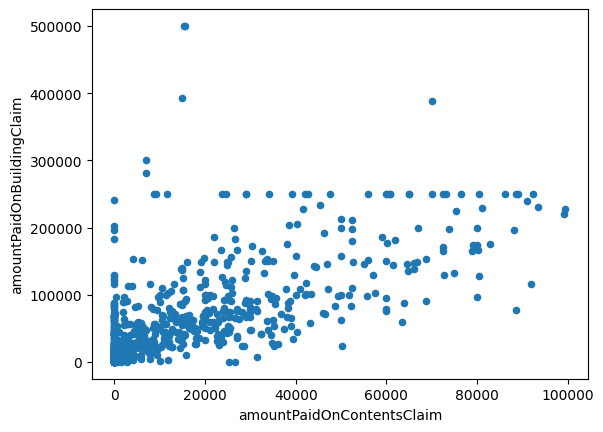

In [10]:
selected_sample = selected_claims.sample(1000, random_state = 1)

selected_sample.plot(kind = 'scatter', x = 'amountPaidOnContentsClaim', y = 'amountPaidOnBuildingClaim')

By randomly selecting 1000 observations before plotting, it looks like that **there is** an association between the two columns of data, and that we run up against the `amountPaidOnBuildingClaim` cap more often than the `amountPaidOnContentsClaim`.

> Bonus: If we want to plot claim amounts by longitude and latitude we can do so with the following:

<Axes: xlabel='longitude', ylabel='latitude'>

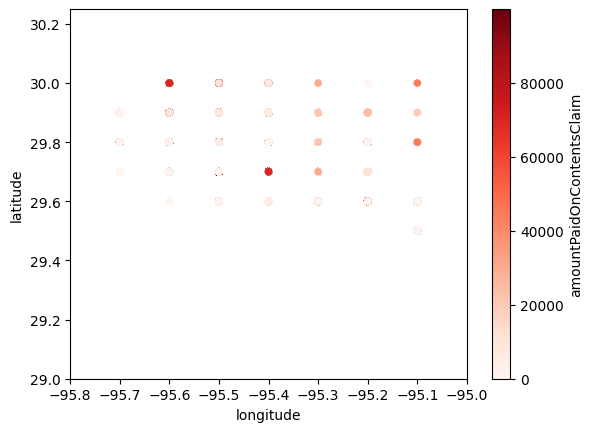

In [11]:
selected_claims.plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'amountPaidOnContentsClaim',
                     ylim = [29, 30.25], xlim = [-95.8, -95], colormap = 'Reds')

### Summary

In this lesson we saw how we can use pandas to create different plots of our data.  We plotted the distribution of each series of data using the `claims_df.hist()` function.  And also used the `hist` method to plot the distribution of a single column of data.

For a more granular control over our plots, we moved to the `plot` method, using the keyword arguments of `kind` to specify a `hist` or `scatter` plot, and `xlim` or `ylim` to only display data within a specific range.  We also provided the `title` and `colormap` arguments to plot.

```python
selected_claims['amountPaidOnContentsClaim'].plot(kind = 'hist',
                                                  title = 'Distribution of Content Claims', xlim = [10000, 100000],
                                                  ylim = [0, 2000],
                                                  colormap = 'summer')
```

To display a scatter plot, we also specified the column for the x values and the column for the y values.

```python
claims_df.plot(kind = 'scatter', x = 'amountPaidOnContentsClaim', y = 'amountPaidOnBuildingClaim')
```